In [1]:
from google.colab import drive

In [4]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
dataset = pd.read_excel(r'/content/gdrive/My Drive/Colab Notebooks/Superstore_USA.xlsx')

In [8]:
display(pd.DataFrame(dataset))

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.320000,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.560000,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.640000,7,49.92,88523
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.510000,7,41.64,88523
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.202300,8,1446.67,88523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9421,20275,Critical,0.06,35.89,14.72,3402,Frederick Cole,Regular Air,Consumer,Office Supplies,...,East,West Virginia,Charleston,25314,2013-05-14,2013-05-15,137.860000,13,447.87,87532
9422,20276,Critical,0.00,3.34,7.49,3402,Frederick Cole,Regular Air,Consumer,Office Supplies,...,East,West Virginia,Charleston,25314,2013-05-14,2013-05-14,-39.070000,3,13.23,87532
9423,24491,Not Specified,0.08,550.98,45.70,3402,Frederick Cole,Delivery Truck,Consumer,Furniture,...,East,West Virginia,Charleston,25314,2013-09-12,2013-09-14,-1225.029097,4,2215.93,87533
9424,25914,High,0.10,105.98,13.99,3403,Tammy Buckley,Express Air,Consumer,Furniture,...,West,Wyoming,Cheyenne,82001,2010-02-08,2010-02-11,349.485000,5,506.50,87530


In [10]:
dataset.head(2)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.32,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.56,4,13.01,88522


In [12]:
dataset.shape

(9426, 24)

In [15]:
#missing value analysis
dataset.isnull().sum()

,0
Row ID,0
Order Priority,0
Discount,0
Unit Price,0
Shipping Cost,0
Customer ID,0
Customer Name,0
Ship Mode,0
Customer Segment,0
Product Category,0


In [14]:
dataset['Product Base Margin'].fillna(dataset['Product Base Margin'].mean(),inplace=True)

In [16]:
#univarient analysis for order piroirty
dataset['Order Priority'].value_counts()

,count
Order Priority,
High,1970
Low,1926
Not Specified,1881
Medium,1844
Critical,1804
Critical,1


In [17]:
dataset['Order Priority'].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical', 'Critical '],
      dtype=object)

In [18]:
dataset['Order Priority'].replace("Critical ","Critical")

,Order Priority
0,Not Specified
1,High
2,Not Specified
3,Not Specified
4,Not Specified
...,...
9421,Critical
9422,Critical
9423,Not Specified
9424,High


In [20]:
dataset['Order Priority'] = dataset['Order Priority'].replace("Critical ","Critical")

In [21]:
#numeric analysis
dataset['Order Priority'].value_counts()

,count
Order Priority,
High,1970
Low,1926
Not Specified,1881
Medium,1844
Critical,1805


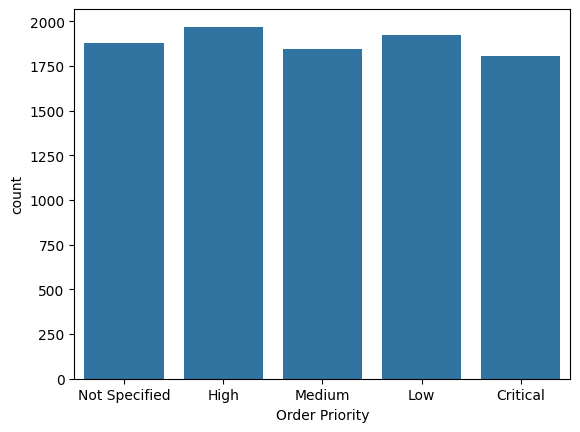

In [22]:
#graphical analysis
sns.countplot(x="Order Priority", data=dataset)
plt.show()

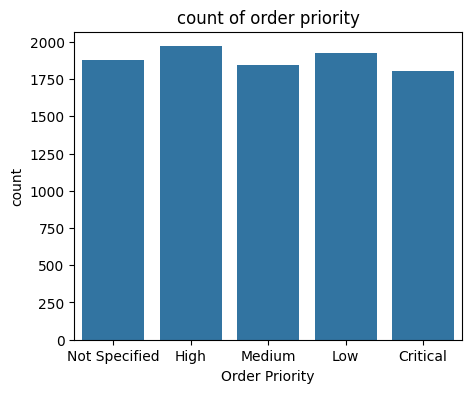

In [27]:
plt.figure(figsize=(5,4))
sns.countplot(x="Order Priority", data=dataset)
plt.title("count of order priority")
plt.savefig("count of order priority.jpg")
plt.show()

SHIPPING MODE ANALYSIS

In [28]:
dataset['Ship Mode'].value_counts()

,count
Ship Mode,
Regular Air,7036
Delivery Truck,1283
Express Air,1107


In [30]:
x=dataset['Ship Mode'].value_counts().index
y=dataset['Ship Mode'].value_counts().values

<function matplotlib.pyplot.show(close=None, block=None)>

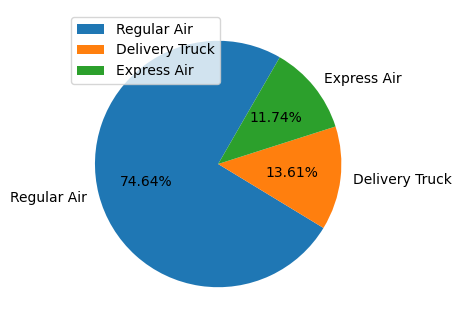

In [62]:
plt.figure(figsize=(5,4))
plt.pie(y,labels=x,startangle=60, autopct="%0.2f%%")
plt.legend(loc=2)
plt.show

BIVARIENT ANALYSIS
we analyze ship mode and the no of product(product cate) sold in which shipping mode

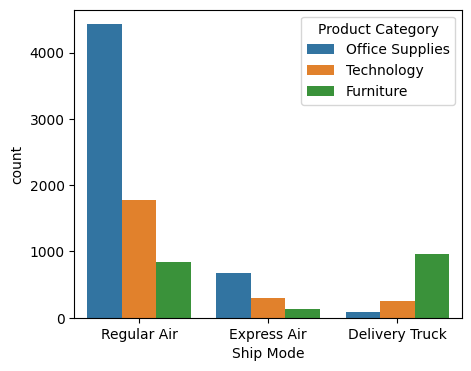

In [43]:
plt.figure(figsize=(5,4))
sns.countplot(x="Ship Mode",data=dataset,hue="Product Category")
plt.show()

customer segement -> build count plot

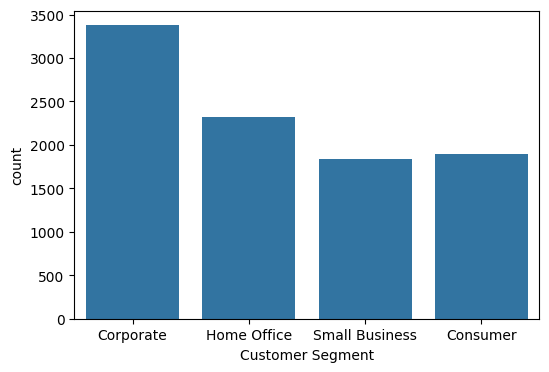

In [48]:
plt.figure(figsize=(6,4))
sns.countplot(x="Customer Segment", data=dataset)
plt.show()

PRODUCT CATEGORY

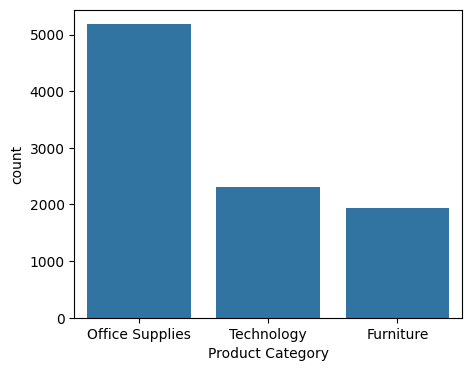

In [49]:
plt.figure(figsize=(5,4))
sns.countplot(x="Product Category", data=dataset)
plt.show()

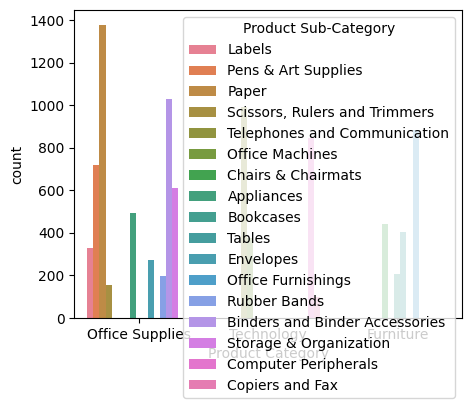

In [52]:
#sub product cat
plt.figure(figsize=(5,4))
sns.countplot(x="Product Category", data=dataset, hue="Product Sub-Category")
plt.show()

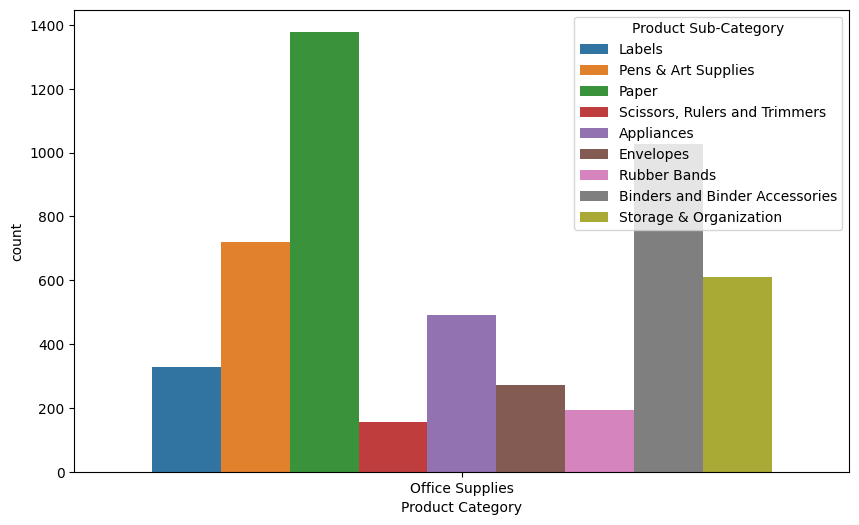

In [54]:
plt.figure(figsize=(10,6))
sns.countplot(x="Product Category", data=dataset[dataset['Product Category']=='Office Supplies'], hue="Product Sub-Category")
plt.show()

Find the year from order date col

In [55]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

In [56]:
dataset['Order Date'].dt.year

,Order Date
0,2012
1,2010
2,2011
3,2011
4,2011
...,...
9421,2013
9422,2013
9423,2013
9424,2010


In [57]:
dataset['order year']=dataset['Order Date'].dt.year

In [58]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

In [59]:
dataset['order year'].value_counts()

,count
order year,
2013,3054
2012,2241
2011,2179
2010,1952


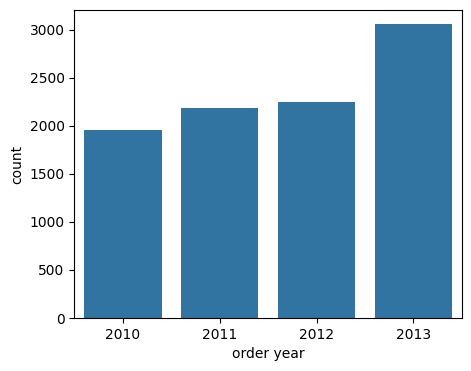

In [60]:
plt.figure(figsize=(5,4))
sns.countplot(x="order year", data=dataset)
plt.show()

Find which category has more profit

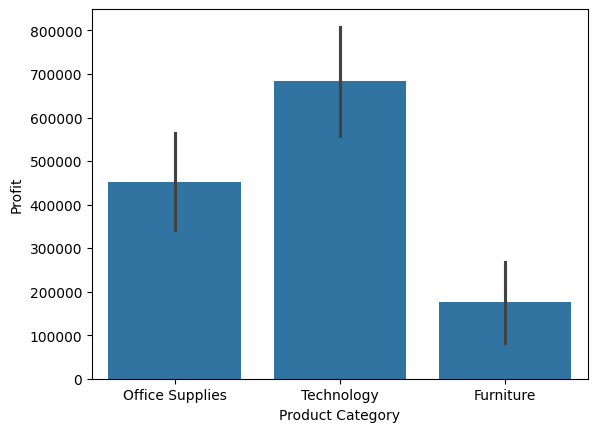

In [63]:
sns.barplot(x="Product Category",y="Profit",data=dataset,estimator='sum')
plt.show()

Find in which states number of sales are made

In [64]:
dataset['State or Province'].value_counts()

,count
State or Province,
California,1021
Texas,646
Illinois,584
New York,574
Florida,522
Ohio,396
Washington,327
Michigan,327
Pennsylvania,271


top 5 states

In [65]:
dataset['State or Province'].value_counts()[:5]

,count
State or Province,
California,1021
Texas,646
Illinois,584
New York,574
Florida,522


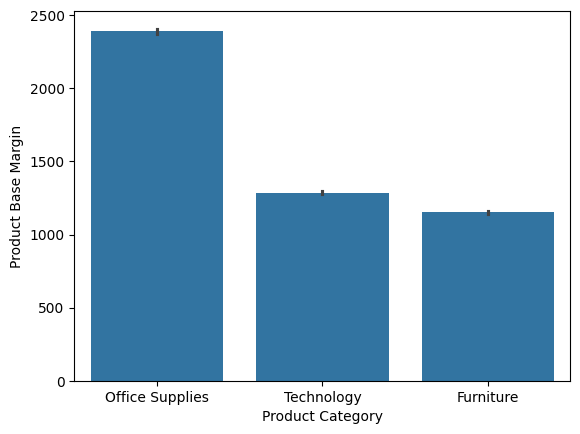

In [67]:
sns.barplot(x="Product Category",y="Product Base Margin",data=dataset,estimator='sum')
plt.show()